# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [23]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [24]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 596


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [25]:
# Set the API base URL
base_url = "http://api.openweathermap.org/data/2.5/weather?q="
api_key= "&appid=" + weather_api_key
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{base_url}{city}{api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | aneho
Processing Record 2 of Set 1 | papatowai
Processing Record 3 of Set 1 | levuka
Processing Record 4 of Set 1 | hasaki
Processing Record 5 of Set 1 | george town
Processing Record 6 of Set 1 | yellowknife
Processing Record 7 of Set 1 | burutu
Processing Record 8 of Set 1 | ar ruways
Processing Record 9 of Set 1 | zhosaly
Processing Record 10 of Set 1 | thompson
Processing Record 11 of Set 1 | sola
Processing Record 12 of Set 1 | pokrovka
Processing Record 13 of Set 1 | port elizabeth
Processing Record 14 of Set 1 | ilulissat
Processing Record 15 of Set 1 | edinburgh of the seven seas
Processing Record 16 of Set 1 | anabar
City not found. Skipping...
Processing Record 17 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 18 of Set 1 | olonkinbyen
Processing Record 19 of Set 1 | enewetak
Processing Record 20 of Set 1 | mount gambier
Processing Record 21 of Set 1 | nemuro

In [26]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64

In [27]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,aneho,6.2333,1.6000,301.26,77,92,4.88,TG,1699689514
1,papatowai,-46.5619,169.4708,286.10,70,44,1.41,NZ,1699689515
2,levuka,50.1834,-105.4011,267.05,78,22,4.11,CA,1699689515
3,hasaki,35.7333,140.8333,287.20,59,100,8.93,JP,1699689515
4,george town,5.4112,100.3354,302.12,81,40,1.03,MY,1699689435


In [28]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [29]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,aneho,6.2333,1.6000,301.26,77,92,4.88,TG,1699689514
1,papatowai,-46.5619,169.4708,286.10,70,44,1.41,NZ,1699689515
2,levuka,50.1834,-105.4011,267.05,78,22,4.11,CA,1699689515
3,hasaki,35.7333,140.8333,287.20,59,100,8.93,JP,1699689515
4,george town,5.4112,100.3354,302.12,81,40,1.03,MY,1699689435


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

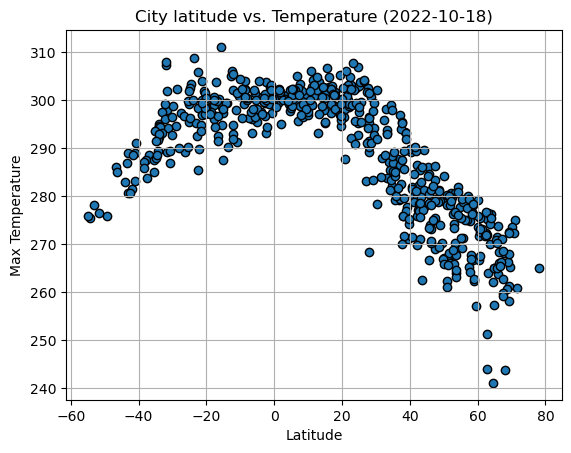

In [30]:
# Build scatter plot for latitude vs. temperature
x_axis=city_data_df['Lat']
y_axis=city_data_df['Max Temp']
plt.scatter(x_axis,y_axis,edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('City latitude vs. Temperature (2022-10-18)')
plt.grid()
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

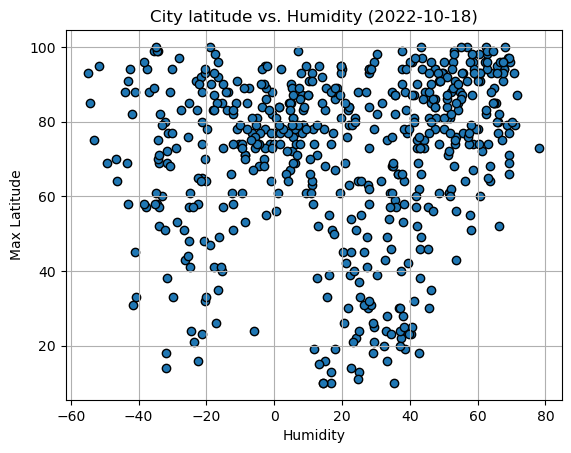

In [31]:
# Build the scatter plots for latitude vs. humidity
x_axis=city_data_df['Lat']
y_axis=city_data_df['Humidity']
plt.scatter(x_axis,y_axis,edgecolors='black')

# Incorporate the other graph properties
plt.ylabel('Max Latitude')
plt.xlabel('Humidity')
plt.title('City latitude vs. Humidity (2022-10-18)')
plt.grid()
# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

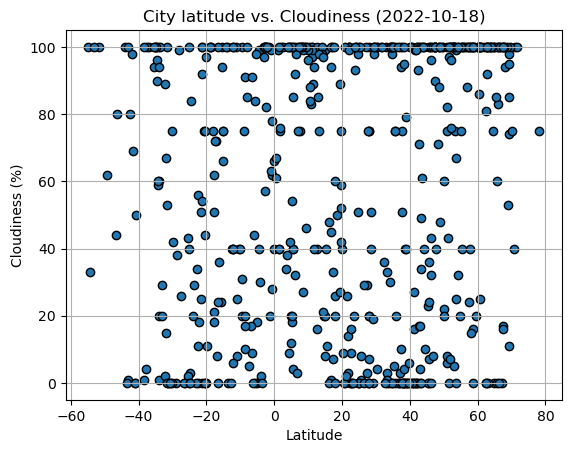

In [32]:
# Build the scatter plots for latitude vs. cloudiness
x_axis=city_data_df['Lat']
y_axis=city_data_df['Cloudiness']
plt.scatter(x_axis,y_axis,edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City latitude vs. Cloudiness (2022-10-18)')
plt.grid()
plt

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

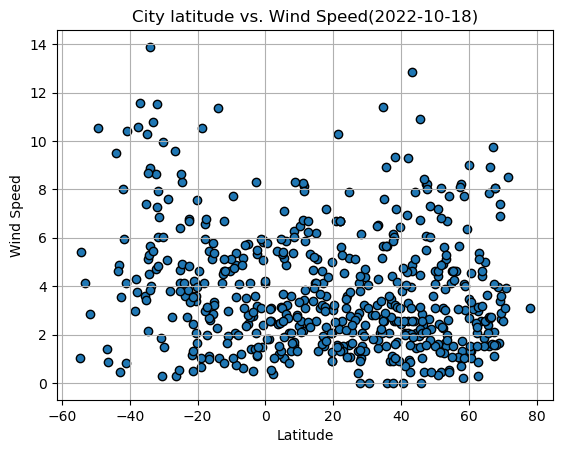

In [33]:
# Build the scatter plots for latitude vs. wind speed
x_axis=city_data_df['Lat']
y_axis=city_data_df['Wind Speed']
plt.scatter(x_axis,y_axis,edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('City latitude vs. Wind Speed(2022-10-18)')
plt.grid()
# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [34]:
# Define a function to create Linear Regression plots
def linear_function(x):
    return slope * x + intercept


In [35]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,aneho,6.2333,1.6000,301.26,77,92,4.88,TG,1699689514
2,levuka,50.1834,-105.4011,267.05,78,22,4.11,CA,1699689515
3,hasaki,35.7333,140.8333,287.20,59,100,8.93,JP,1699689515
4,george town,5.4112,100.3354,302.12,81,40,1.03,MY,1699689435
5,yellowknife,62.4560,-114.3525,272.44,100,0,2.06,CA,1699689300


In [36]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]


# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,papatowai,-46.5619,169.4708,286.10,70,44,1.41,NZ,1699689515
10,sola,-13.8833,167.5500,299.44,83,100,11.37,VU,1699689516
12,port elizabeth,-33.9180,25.5701,294.99,69,20,13.89,ZA,1699689516
14,edinburgh of the seven seas,-37.0676,-12.3116,288.69,88,100,11.56,SH,1699689517
17,mount gambier,-37.8333,140.7667,287.50,57,4,3.74,AU,1699689517


###  Temperature vs. Latitude Linear Regression Plot

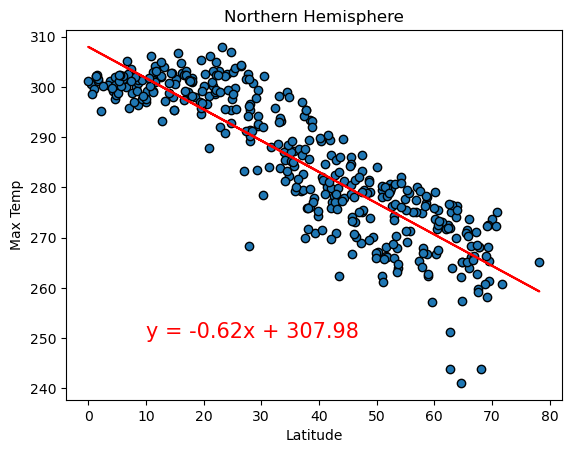

In [37]:
# Linear regression on Northern Hemisphere
x_values= northern_hemi_df['Lat']
y_values= northern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter (northern_hemi_df['Lat'], northern_hemi_df['Max Temp'],edgecolors='black')
plt.plot(northern_hemi_df['Lat'], regress_values, color='r',)
plt.title('Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(10,250),fontsize=15,color="red")

plt.show()

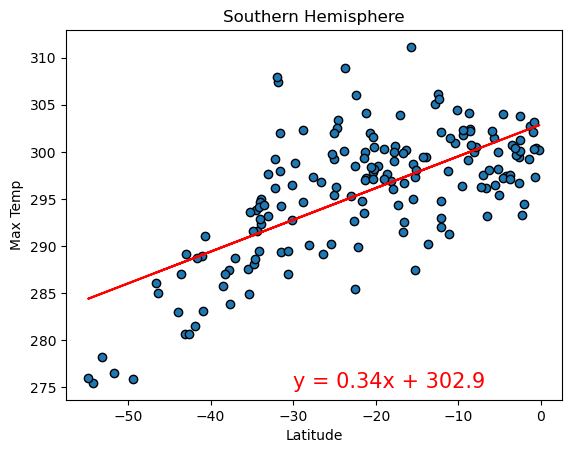

In [38]:
# Linear regression on Southern Hemisphere
x_values= southern_hemi_df['Lat']
y_values= southern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter (southern_hemi_df['Lat'], southern_hemi_df['Max Temp'],edgecolors='black')
plt.plot(southern_hemi_df['Lat'], regress_values, color='r',)
plt.title('Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(-30,275),fontsize=15,color="red")
plt.show()

**Discussion about the linear relationship:** The relationship is that both hemispheres end in the same range of temperature (300-310)

### Humidity vs. Latitude Linear Regression Plot

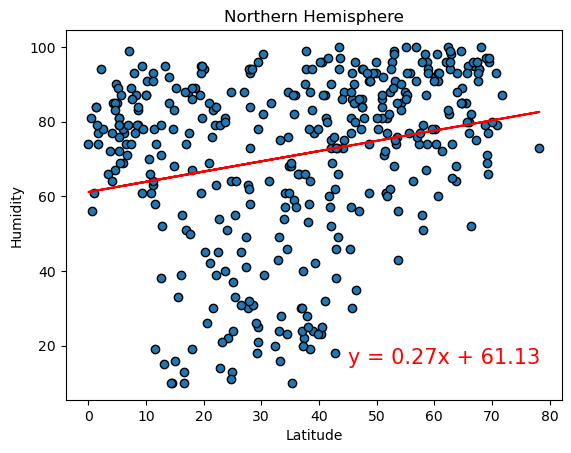

In [39]:
# Northern Hemisphere
x_values= northern_hemi_df['Lat']
y_values= northern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter (northern_hemi_df['Lat'], northern_hemi_df['Humidity'],edgecolors='black')
plt.plot(northern_hemi_df['Lat'], regress_values, color='r',)
plt.title('Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(45,15),fontsize=15,color="red")
plt.show()

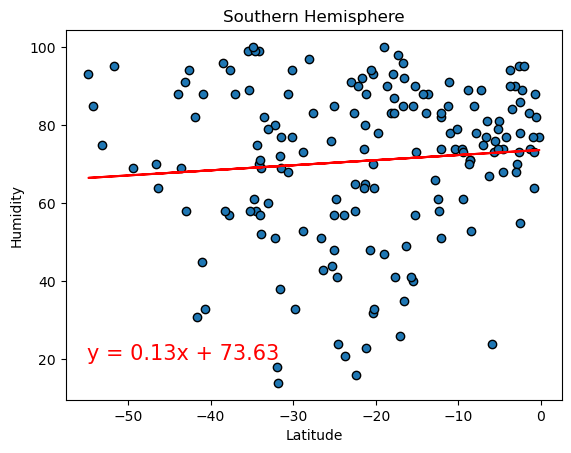

In [40]:
# Southern Hemisphere
x_values= southern_hemi_df['Lat']
y_values= southern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter (southern_hemi_df['Lat'], southern_hemi_df['Humidity'],edgecolors='black')
plt.plot(southern_hemi_df['Lat'], regress_values, color='r',)
plt.title('Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")
plt.show()

**Discussion about the linear relationship:** the relationship is that the humidity on both hemispheres tend to go up.

### Cloudiness vs. Latitude Linear Regression Plot

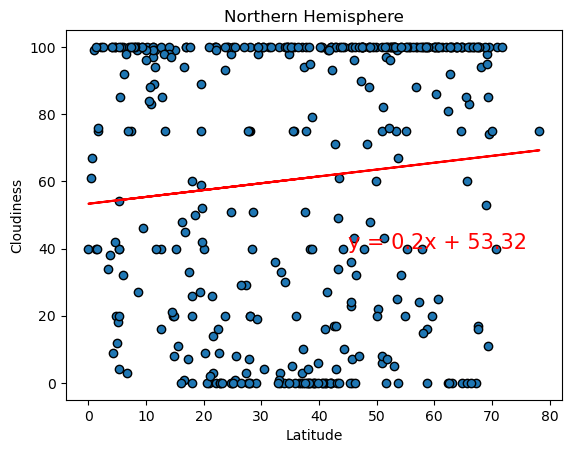

In [41]:
# Northern Hemisphere
x_values= northern_hemi_df['Lat']
y_values= northern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter (northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'],edgecolors='black')
plt.plot(northern_hemi_df['Lat'], regress_values, color='r',)
plt.title('Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(45,40),fontsize=15,color="red")
plt.show()

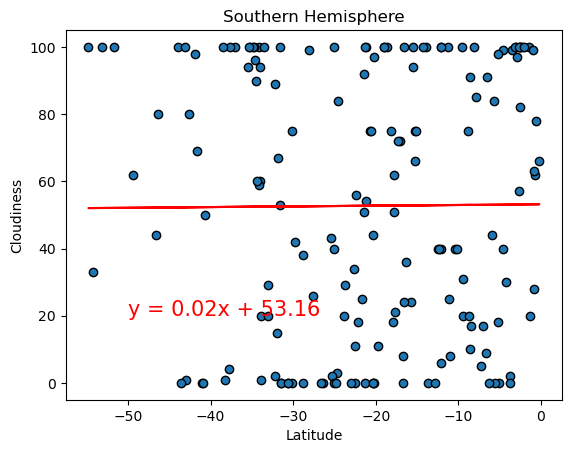

In [42]:
# Southern Hemisphere
x_values= southern_hemi_df['Lat']
y_values= southern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter (southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'],edgecolors='black')
plt.plot(southern_hemi_df['Lat'], regress_values, color='r',)
plt.title('Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.show()

**Discussion about the linear relationship:** The cloudiness in th northen hemisphere will always be more dense.

### Wind Speed vs. Latitude Linear Regression Plot

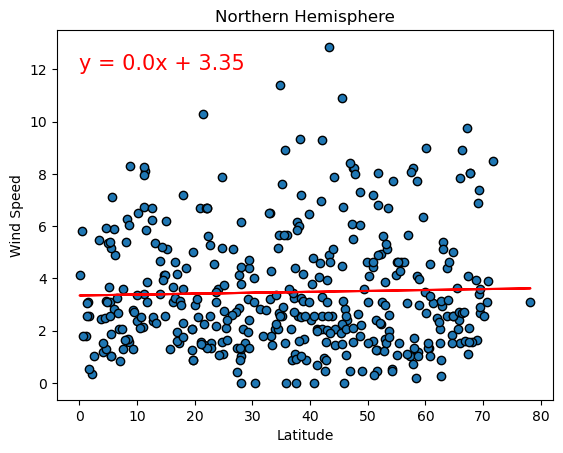

In [43]:
# Northern Hemisphere
x_values= northern_hemi_df['Lat']
y_values= northern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter (northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'],edgecolors='black')
plt.plot(northern_hemi_df['Lat'], regress_values, color='r',)
plt.title('Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(0,12),fontsize=15,color="red")
plt.show()

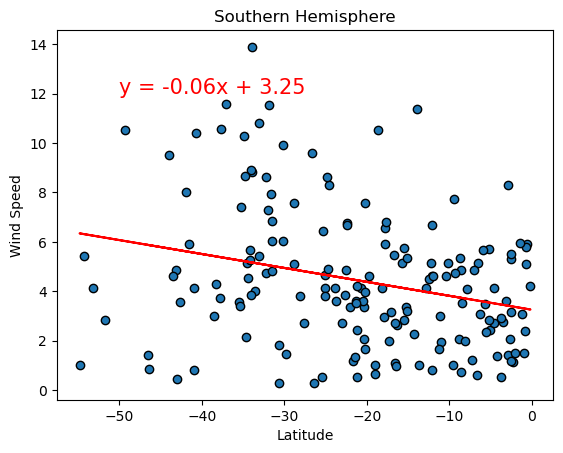

In [44]:
# Southern Hemisphere
x_values= southern_hemi_df['Lat']
y_values= southern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter (southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'],edgecolors='black')
plt.plot(southern_hemi_df['Lat'], regress_values, color='r',)
plt.title('Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(-50,12),fontsize=15,color="red")
plt.show()


**Discussion about the linear relationship:** The wind speeds in both hemispheres stay about the same speed.